In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import fastf1 as f1
from ing_theme_matplotlib import mpl_style
import mplcyberpunk
from fastf1 import plotting

In [2]:
f1.Cache.enable_cache("../cache")

In [3]:
quali = f1.get_session(2024, "Mexico", "Qualifying")
quali.load()

core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            I

In [4]:
quali.session_info

{'Meeting': {'Key': 1248,
  'Name': 'Mexico City Grand Prix',
  'OfficialName': 'FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2024',
  'Location': 'Mexico City',
  'Number': 20,
  'Country': {'Key': 8, 'Code': 'MEX', 'Name': 'Mexico'},
  'Circuit': {'Key': 65, 'ShortName': 'Mexico City'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9621,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2024, 10, 26, 15, 0),
 'EndDate': datetime.datetime(2024, 10, 26, 16, 0),
 'GmtOffset': datetime.timedelta(days=-1, seconds=64800),
 'Path': '2024/2024-10-27_Mexico_City_Grand_Prix/2024-10-26_Qualifying/'}

In [5]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
55,SAI,Ferrari,NaN,1.0,NaT,
1,VER,Red Bull Racing,NaN,2.0,NaT,
4,NOR,McLaren,NaN,3.0,NaT,
16,LEC,Ferrari,NaN,4.0,NaT,
63,RUS,Mercedes,NaN,5.0,NaT,
44,HAM,Mercedes,NaN,6.0,NaT,
20,MAG,Haas F1 Team,NaN,7.0,NaT,
10,GAS,Alpine,NaN,8.0,NaT,
23,ALB,Williams,NaN,9.0,NaT,
27,HUL,Haas F1 Team,NaN,10.0,NaT,


In [6]:
quali.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:15:40.717000,SAI,55,NaT,1.0,1.0,0 days 00:13:56.682000,NaT,NaT,0 days 00:00:37.666000,...,True,Ferrari,0 days 00:13:56.682000,2024-10-26 21:01:28.446,1,NaN,False,,False,False
1,0 days 00:16:58.161000,SAI,55,0 days 00:01:17.444000,2.0,1.0,NaT,NaT,0 days 00:00:27.479000,0 days 00:00:29.904000,...,True,Ferrari,0 days 00:15:40.717000,2024-10-26 21:03:12.481,1,NaN,False,,False,True
2,0 days 00:18:49.582000,SAI,55,0 days 00:01:51.421000,3.0,1.0,NaT,0 days 00:18:46.859000,0 days 00:00:40.418000,0 days 00:00:42.630000,...,True,Ferrari,0 days 00:16:58.161000,2024-10-26 21:04:29.925,1,NaN,False,,False,False
3,0 days 00:20:56.473000,SAI,55,0 days 00:02:06.891000,4.0,2.0,0 days 00:19:10.231000,NaT,0 days 00:01:06.924000,0 days 00:00:36.980000,...,False,Ferrari,0 days 00:18:49.582000,2024-10-26 21:06:21.346,1,NaN,False,,False,False
4,0 days 00:22:13.714000,SAI,55,0 days 00:01:17.241000,5.0,2.0,NaT,NaT,0 days 00:00:27.323000,0 days 00:00:30.078000,...,False,Ferrari,0 days 00:20:56.473000,2024-10-26 21:08:28.237,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0 days 00:23:00.660000,ZHO,24,0 days 00:01:18.253000,5.0,2.0,NaT,NaT,0 days 00:00:27.805000,0 days 00:00:30.329000,...,True,Kick Sauber,0 days 00:21:42.407000,2024-10-26 21:09:14.171,1,NaN,False,,False,True
285,0 days 00:24:31.403000,ZHO,24,0 days 00:01:30.743000,6.0,2.0,NaT,0 days 00:24:28.777000,0 days 00:00:30.592000,0 days 00:00:34.019000,...,True,Kick Sauber,0 days 00:23:00.660000,2024-10-26 21:10:32.424,1,NaN,False,,False,False
286,0 days 00:28:09.794000,ZHO,24,NaT,7.0,3.0,0 days 00:26:24.224000,NaT,NaT,0 days 00:00:38.072000,...,False,Kick Sauber,0 days 00:24:31.403000,2024-10-26 21:12:03.167,1,NaN,False,,False,False
287,0 days 00:29:27.866000,ZHO,24,0 days 00:01:18.072000,8.0,3.0,NaT,NaT,0 days 00:00:27.746000,0 days 00:00:30.217000,...,False,Kick Sauber,0 days 00:28:09.794000,2024-10-26 21:15:41.558,1,NaN,False,,False,True


In [7]:
sai = quali.get_driver("SAI")
sai

DriverNumber                                                         55
BroadcastName                                                   C SAINZ
Abbreviation                                                        SAI
DriverId                                                          sainz
TeamName                                                        Ferrari
TeamColor                                                        E80020
TeamId                                                          ferrari
FirstName                                                        Carlos
LastName                                                          Sainz
FullName                                                   Carlos Sainz
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         ESP
Position                                                            1.0
ClassifiedPosition                                              

In [8]:
sai_laps = quali.laps.pick_driver("SAI")
sai_lap_time = sai_laps["LapTime"]
sai_sec1 = sai_laps["Sector1Time"]
sai_sec2 = sai_laps["Sector2Time"]
sai_sec3 = sai_laps["Sector3Time"]
sai_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:37.666000,0 days 00:00:22.687000,274.0,275.0,255.0,275.0
1,0 days 00:01:17.444000,0 days 00:00:27.479000,0 days 00:00:29.904000,0 days 00:00:20.061000,317.0,295.0,253.0,347.0
2,0 days 00:01:51.421000,0 days 00:00:40.418000,0 days 00:00:42.630000,0 days 00:00:28.373000,194.0,258.0,NaN,214.0
3,0 days 00:02:06.891000,0 days 00:01:06.924000,0 days 00:00:36.980000,0 days 00:00:22.987000,280.0,265.0,255.0,248.0
4,0 days 00:01:17.241000,0 days 00:00:27.323000,0 days 00:00:30.078000,0 days 00:00:19.840000,318.0,297.0,253.0,349.0
5,0 days 00:01:42.568000,0 days 00:00:38.815000,0 days 00:00:36.247000,0 days 00:00:27.506000,223.0,260.0,NaN,221.0
6,NaT,NaT,0 days 00:00:36.562000,0 days 00:00:26.541000,289.0,277.0,256.0,286.0
7,0 days 00:01:16.778000,0 days 00:00:27.239000,0 days 00:00:29.740000,0 days 00:00:19.799000,319.0,298.0,254.0,348.0
8,0 days 00:01:44.562000,0 days 00:00:37.053000,0 days 00:00:38.947000,0 days 00:00:28.562000,203.0,227.0,NaN,221.0
9,NaT,NaT,0 days 00:00:37.167000,0 days 00:00:22.321000,251.0,269.0,255.0,285.0


In [9]:
fastest_sai = sai_laps.pick_fastest()
tele_sai = fastest_sai.get_telemetry().add_distance()
tele_sai.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,262,6,11347
3,263,6,11152
4,265,7,10761
5,271,7,10869
6,275,7,11016
...,...,...,...
584,253,6,11648
585,256,6,11802
586,261,6,10758
587,262,6,10747


In [11]:
ver = quali.get_driver("VER")
ver

DriverNumber                                                          1
BroadcastName                                              M VERSTAPPEN
Abbreviation                                                        VER
DriverId                                                 max_verstappen
TeamName                                                Red Bull Racing
TeamColor                                                        3671C6
TeamId                                                         red_bull
FirstName                                                           Max
LastName                                                     Verstappen
FullName                                                 Max Verstappen
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         NED
Position                                                            2.0
ClassifiedPosition                                              

In [13]:
ver_laps = quali.laps.pick_driver("VER")
ver_lap_time = ver_laps["LapTime"]
ver_sec1 = ver_laps["Sector1Time"]
ver_sec2 = ver_laps["Sector2Time"]
ver_sec3 = ver_laps["Sector3Time"]
ver_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
21,NaT,NaT,0 days 00:00:39.096000,0 days 00:00:23.964000,238.0,210.0,254.0,289.0
22,0 days 00:01:16.998000,0 days 00:00:27.336000,0 days 00:00:29.791000,0 days 00:00:19.871000,316.0,296.0,252.0,348.0
23,0 days 00:01:45.265000,0 days 00:00:37.370000,0 days 00:00:39.876000,0 days 00:00:28.019000,194.0,216.0,NaN,257.0
24,NaT,NaT,0 days 00:00:39.946000,0 days 00:00:23.197000,200.0,211.0,254.0,190.0
25,0 days 00:01:16.803000,0 days 00:00:27.326000,0 days 00:00:29.712000,0 days 00:00:19.765000,316.0,297.0,253.0,348.0
26,0 days 00:01:40.519000,0 days 00:00:33.692000,0 days 00:00:38.674000,0 days 00:00:28.153000,221.0,255.0,NaN,248.0
27,NaT,NaT,0 days 00:00:37.844000,0 days 00:00:25.421000,258.0,256.0,254.0,245.0
28,0 days 00:01:16.629000,0 days 00:00:27.429000,0 days 00:00:29.465000,0 days 00:00:19.735000,315.0,297.0,251.0,347.0
29,0 days 00:01:42.827000,0 days 00:00:35.739000,0 days 00:00:39.648000,0 days 00:00:27.440000,197.0,239.0,NaN,235.0
30,NaT,NaT,0 days 00:00:40.687000,0 days 00:00:23.381000,222.0,265.0,254.0,212.0


In [14]:
fastest_ver = ver_laps.pick_fastest()
tele_ver = fastest_ver.get_telemetry().add_distance()
tele_ver.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,263,6,10649
3,264,6,10677
4,266,6,10734
5,268,7,10791
6,270,7,10840
...,...,...,...
580,252,6,11379
581,255,6,11452
582,258,6,11525
583,259,6,11544


In [15]:
nor = quali.get_driver("NOR")
nor

DriverNumber                                                          4
BroadcastName                                                  L NORRIS
Abbreviation                                                        NOR
DriverId                                                         norris
TeamName                                                        McLaren
TeamColor                                                        FF8000
TeamId                                                          mclaren
FirstName                                                         Lando
LastName                                                         Norris
FullName                                                   Lando Norris
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         GBR
Position                                                            3.0
ClassifiedPosition                                              

In [16]:
nor_laps = quali.laps.pick_driver("NOR")
nor_lap_time = nor_laps["LapTime"]
nor_sec1 = nor_laps["Sector1Time"]
nor_sec2 = nor_laps["Sector2Time"]
nor_sec3 = nor_laps["Sector3Time"]
nor_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
39,NaT,NaT,0 days 00:00:39.305000,0 days 00:00:24.072000,259.0,258.0,255.0,264.0
40,0 days 00:01:17.203000,0 days 00:00:27.414000,0 days 00:00:29.915000,0 days 00:00:19.874000,318.0,297.0,251.0,347.0
41,0 days 00:01:48.041000,0 days 00:00:32.995000,0 days 00:00:42.003000,0 days 00:00:33.043000,207.0,173.0,NaN,254.0
42,NaT,NaT,0 days 00:00:34.544000,0 days 00:00:26.810000,267.0,187.0,255.0,258.0
43,0 days 00:01:16.505000,0 days 00:00:27.404000,0 days 00:00:29.431000,0 days 00:00:19.670000,315.0,296.0,250.0,346.0
44,0 days 00:01:39.304000,0 days 00:00:33.286000,0 days 00:00:37.401000,0 days 00:00:28.617000,205.0,227.0,NaN,256.0
45,NaT,NaT,0 days 00:00:33.817000,0 days 00:00:27.824000,291.0,274.0,255.0,241.0
46,0 days 00:01:16.301000,0 days 00:00:27.204000,0 days 00:00:29.422000,0 days 00:00:19.675000,315.0,296.0,252.0,346.0
47,0 days 00:01:36.388000,0 days 00:00:32.901000,0 days 00:00:36.056000,0 days 00:00:27.431000,213.0,255.0,NaN,251.0
48,NaT,NaT,0 days 00:00:33.984000,0 days 00:00:21.926000,281.0,280.0,256.0,265.0


In [17]:
fastest_nor = nor_laps.pick_fastest()
tele_nor = fastest_nor.get_telemetry().add_distance()
tele_nor.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,262,6,11616
3,264,6,11298
4,267,7,10663
5,270,7,10801
6,272,7,10866
...,...,...,...
574,252,6,11634
575,254,6,11744
576,258,6,11918
577,260,6,11256


In [18]:
kmag = quali.get_driver("MAG")
kmag

DriverNumber                                                         20
BroadcastName                                               K MAGNUSSEN
Abbreviation                                                        MAG
DriverId                                                kevin_magnussen
TeamName                                                   Haas F1 Team
TeamColor                                                        B6BABD
TeamId                                                             haas
FirstName                                                         Kevin
LastName                                                      Magnussen
FullName                                                Kevin Magnussen
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         DEN
Position                                                            7.0
ClassifiedPosition                                              

In [19]:
kmag_laps = quali.laps.pick_driver("MAG")
kmag_lap_time = kmag_laps["LapTime"]
kmag_sec1 = kmag_laps["Sector1Time"]
kmag_sec2 = kmag_laps["Sector2Time"]
kmag_sec3 = kmag_laps["Sector3Time"]
kmag_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
113,NaT,NaT,0 days 00:00:36.098000,0 days 00:00:32.341000,249.0,271.0,255.0,274.0
114,0 days 00:01:17.693000,0 days 00:00:27.389000,0 days 00:00:30.257000,0 days 00:00:20.047000,318.0,293.0,254.0,348.0
115,0 days 00:01:32.181000,0 days 00:00:30.263000,0 days 00:00:34.571000,0 days 00:00:27.347000,255.0,265.0,NaN,278.0
116,NaT,NaT,0 days 00:00:36.222000,0 days 00:00:25.850000,275.0,252.0,257.0,278.0
117,0 days 00:01:17.125000,0 days 00:00:27.272000,0 days 00:00:29.902000,0 days 00:00:19.951000,320.0,298.0,254.0,350.0
118,0 days 00:01:49.868000,0 days 00:00:45.430000,0 days 00:00:37.249000,0 days 00:00:27.189000,217.0,262.0,NaN,149.0
119,NaT,NaT,0 days 00:00:34.009000,0 days 00:00:23.099000,265.0,265.0,256.0,276.0
120,0 days 00:01:17.181000,0 days 00:00:27.392000,0 days 00:00:29.935000,0 days 00:00:19.854000,318.0,296.0,254.0,347.0
121,0 days 00:01:40.748000,0 days 00:00:36.861000,0 days 00:00:35.452000,0 days 00:00:28.435000,276.0,99.0,NaN,171.0
122,NaT,NaT,0 days 00:00:40.955000,0 days 00:00:24.623000,242.0,136.0,257.0,200.0


In [20]:
fastest_kmag = kmag_laps.pick_fastest()
tele_kmag = fastest_kmag.get_telemetry().add_distance()
tele_kmag.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,266,6,11024
3,267,6,10982
4,269,7,10898
5,271,7,10919
6,273,7,10941
...,...,...,...
598,251,6,11555
599,255,6,11675
600,259,6,11796
601,261,6,11798


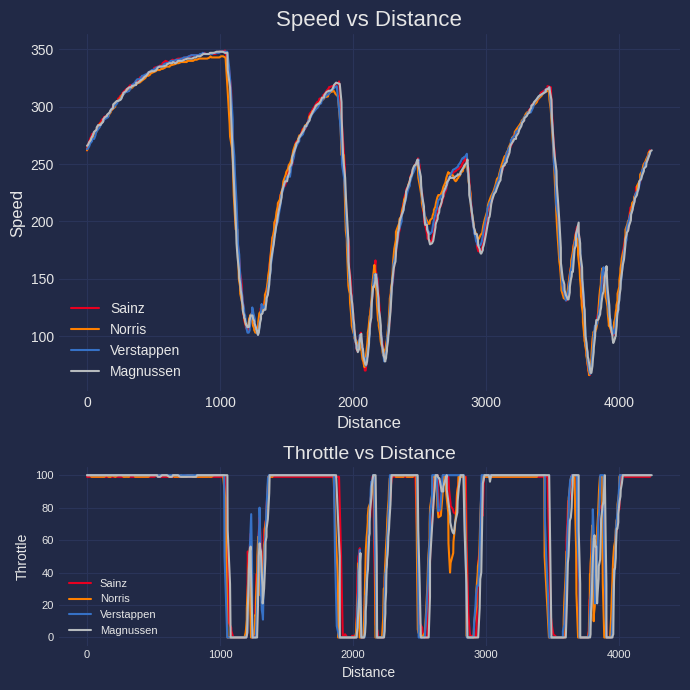

In [21]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_sai.Distance, tele_sai.Speed, label="Sainz", color=get_driver_color("SAI")
)
ax[0].plot(
    tele_nor.Distance, tele_nor.Speed, label="Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_ver.Distance, tele_ver.Speed, label="Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_kmag.Distance, tele_kmag.Speed, label="Magnussen", color=get_driver_color("MAG")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_sai.Distance, tele_sai.Throttle, label="Sainz", color=get_driver_color("SAI")
)
ax[1].plot(
    tele_nor.Distance, tele_nor.Throttle, label="Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_ver.Distance, tele_ver.Throttle, label="Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_kmag.Distance, tele_kmag.Throttle, label="Magnussen", color=get_driver_color("MAG")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [22]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

In [23]:
driver1_sectors = pd.DataFrame(
    {
        "Driver": ["Sainz"] * len(sai_sec1),
        "Sector1Time": sai_sec1,
        "Sector2Time": sai_sec2,
        "Sector3Time": sai_sec3,
        "Lap Time": sai_lap_time,
    }
)

driver2_sectors = pd.DataFrame(
    {
        "Driver": ["Norris"] * len(nor_sec1),
        "Sector1Time": nor_sec1,
        "Sector2Time": nor_sec2,
        "Sector3Time": nor_sec3,
        "Lap Time": nor_lap_time,
    }
)

driver3_sectors = pd.DataFrame(
    {
        "Driver": ["Verstappen"] * len(ver_sec1),
        "Sector1Time": ver_sec1,
        "Sector2Time": ver_sec2,
        "Sector3Time": ver_sec3,
        "Lap Time": ver_lap_time,
    }
)

driver4_sectors = pd.DataFrame(
    {
        "Driver": ["Magnussen"] * len(kmag_sec1),
        "Sector1Time": kmag_sec1,
        "Sector2Time": kmag_sec2,
        "Sector3Time": kmag_sec3,
        "Lap Time": kmag_lap_time,
    }
)

all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors,driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors["Sector1Time"] = all_drivers_sectors["Sector1Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Sector2Time"] = all_drivers_sectors["Sector2Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Sector3Time"] = all_drivers_sectors["Sector3Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Lap Time"] = all_drivers_sectors["Lap Time"].apply(
    convert_to_normal
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Sainz,00:27.479000,00:29.904000,00:20.061000,01:17.444000
2,Sainz,00:40.418000,00:42.630000,00:28.373000,01:51.421000
3,Sainz,01:06.924000,00:36.980000,00:22.987000,02:06.891000
4,Sainz,00:27.323000,00:30.078000,00:19.840000,01:17.241000
5,Sainz,00:38.815000,00:36.247000,00:27.506000,01:42.568000
7,Sainz,00:27.239000,00:29.740000,00:19.799000,01:16.778000
8,Sainz,00:37.053000,00:38.947000,00:28.562000,01:44.562000
10,Sainz,00:27.373000,00:29.828000,00:19.826000,01:17.027000
11,Sainz,00:37.394000,00:36.703000,00:26.047000,01:40.144000
13,Sainz,00:27.239000,00:29.567000,00:19.709000,01:16.515000


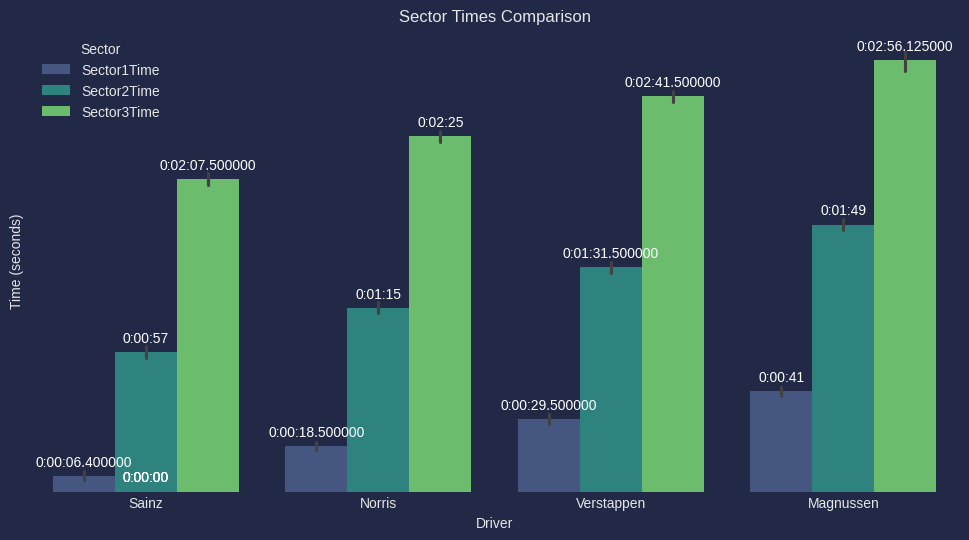

In [41]:
from datetime import timedelta

melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=melted_data, x="Driver", y="Time", hue="Sector", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(
        f"{timedelta(seconds=height)}", 
        (p.get_x() + p.get_width() / 2.0, height),
        ha="center",
        va="bottom",
        fontsize=10,
        color="white",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Driver")
plt.gca().set_yticks([])
plt.gca().invert_yaxis()
plt.show()

*Race*

In [42]:
race = f1.get_session(2024, "Mexico", "R")
race.load()

core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	N

In [43]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
55,SAI,Ferrari,1.0,1.0,0 days 01:40:55.800000,Finished
4,NOR,McLaren,3.0,2.0,0 days 00:00:04.705000,Finished
16,LEC,Ferrari,4.0,3.0,0 days 00:00:34.387000,Finished
44,HAM,Mercedes,6.0,4.0,0 days 00:00:44.780000,Finished
63,RUS,Mercedes,5.0,5.0,0 days 00:00:48.536000,Finished
1,VER,Red Bull Racing,2.0,6.0,0 days 00:00:59.558000,Finished
20,MAG,Haas F1 Team,7.0,7.0,0 days 00:01:03.642000,Finished
81,PIA,McLaren,17.0,8.0,0 days 00:01:04.928000,Finished
27,HUL,Haas F1 Team,10.0,9.0,NaT,+1 Lap
10,GAS,Alpine,8.0,10.0,NaT,+1 Lap


In [44]:
laps = race.laps
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:49.062000,SAI,55,0 days 00:01:47.224000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.495000,...,True,Ferrari,0 days 00:56:01.523000,2024-10-27 20:03:34.674,124,4.0,False,,False,False
1,0 days 01:00:06.999000,SAI,55,0 days 00:02:17.937000,2.0,1.0,NaT,NaT,0 days 00:01:01.514000,0 days 00:00:46.266000,...,True,Ferrari,0 days 00:57:49.062000,2024-10-27 20:05:22.213,4,2.0,False,,False,False
2,0 days 01:02:20.770000,SAI,55,0 days 00:02:13.771000,3.0,1.0,NaT,NaT,0 days 00:00:56.743000,0 days 00:00:47.358000,...,True,Ferrari,0 days 01:00:06.999000,2024-10-27 20:07:40.150,4,2.0,False,,False,False
3,0 days 01:04:30.813000,SAI,55,0 days 00:02:10.043000,4.0,1.0,NaT,NaT,0 days 00:00:52.782000,0 days 00:00:46.662000,...,True,Ferrari,0 days 01:02:20.770000,2024-10-27 20:09:53.921,4,2.0,False,,False,False
4,0 days 01:06:40.738000,SAI,55,0 days 00:02:09.925000,5.0,1.0,NaT,NaT,0 days 00:00:53.462000,0 days 00:00:46.644000,...,True,Ferrari,0 days 01:04:30.813000,2024-10-27 20:12:03.964,4,2.0,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0 days 01:18:35.290000,ALO,14,0 days 00:01:24.166000,13.0,1.0,NaT,NaT,0 days 00:00:29.336000,0 days 00:00:33.275000,...,False,Aston Martin,0 days 01:17:11.124000,2024-10-27 20:24:44.275,1,13.0,False,,False,True
1211,0 days 01:19:59.656000,ALO,14,0 days 00:01:24.366000,14.0,1.0,NaT,NaT,0 days 00:00:29.526000,0 days 00:00:33.258000,...,False,Aston Martin,0 days 01:18:35.290000,2024-10-27 20:26:08.441,1,13.0,False,,False,True
1212,0 days 01:21:28.077000,ALO,14,0 days 00:01:28.421000,15.0,1.0,NaT,0 days 01:21:25.485000,0 days 00:00:29.259000,0 days 00:00:33.443000,...,False,Aston Martin,0 days 01:19:59.656000,2024-10-27 20:27:32.807,1,17.0,False,,False,False
1213,0 days 00:57:46.897000,ALB,23,NaT,1.0,1.0,NaT,NaT,NaT,NaT,...,True,Williams,0 days 00:56:01.523000,2024-10-27 20:03:34.674,124,2.0,False,,True,False


In [47]:
sai_race = race.laps.pick_driver("SAI")
fastest_lap_sai_race = sai_race.pick_fastest().LapTime
sai_race_lap_time = sai_race["LapTime"]
sai_race_sec1 = sai_race["Sector1Time"]
sai_race_sec2 = sai_race["Sector2Time"]
sai_race_sec3 = sai_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_sai_race),
    "which was in Lap number",
    sai_race.pick_fastest().LapNumber,
)
sai_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:20.137000 which was in Lap number 62.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:47.224000,NaT,0 days 00:00:41.495000,0 days 00:00:33.841000,227.0,135.0,193.0,310.0
1,0 days 00:02:17.937000,0 days 00:01:01.514000,0 days 00:00:46.266000,0 days 00:00:30.157000,100.0,176.0,208.0,194.0
2,0 days 00:02:13.771000,0 days 00:00:56.743000,0 days 00:00:47.358000,0 days 00:00:29.670000,130.0,178.0,200.0,142.0
3,0 days 00:02:10.043000,0 days 00:00:52.782000,0 days 00:00:46.662000,0 days 00:00:30.599000,122.0,235.0,195.0,122.0
4,0 days 00:02:09.925000,0 days 00:00:53.462000,0 days 00:00:46.644000,0 days 00:00:29.819000,147.0,217.0,197.0,158.0


In [48]:
fastest_lap_race_sai = sai_race.pick_fastest()
tele_race_sai = fastest_lap_race_sai.get_telemetry().add_distance()
speed_race_sai = tele_race_sai.Speed
tele_race_sai.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,260,6,10964
3,261,6,10649
4,265,7,10787
5,266,7,10797
6,267,7,10807
...,...,...,...
599,250,6,11564
600,254,6,11631
601,256,6,11333
602,259,6,11036


In [45]:
nor_race = race.laps.pick_driver("NOR")
fastest_lap_nor_race = nor_race.pick_fastest().LapTime
nor_race_lap_time = nor_race["LapTime"]
nor_race_sec1 = nor_race["Sector1Time"]
nor_race_sec2 = nor_race["Sector2Time"]
nor_race_sec3 = nor_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_nor_race),
    "which was in Lap number",
    nor_race.pick_fastest().LapNumber,
)
nor_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:19.691000 which was in Lap number 68.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
71,0 days 00:01:49.304000,NaT,0 days 00:00:43.772000,0 days 00:00:33.166000,286.0,148.0,168.0,310.0
72,0 days 00:02:18.718000,0 days 00:01:01.310000,0 days 00:00:45.418000,0 days 00:00:31.990000,136.0,245.0,129.0,236.0
73,0 days 00:02:13.243000,0 days 00:00:55.115000,0 days 00:00:47.546000,0 days 00:00:30.582000,133.0,245.0,202.0,132.0
74,0 days 00:02:11.100000,0 days 00:00:53.677000,0 days 00:00:45.306000,0 days 00:00:32.117000,207.0,236.0,166.0,178.0
75,0 days 00:02:09.824000,0 days 00:00:52.259000,0 days 00:00:46.781000,0 days 00:00:30.784000,209.0,227.0,157.0,197.0


In [46]:
fastest_lap_race_nor = nor_race.pick_fastest()
tele_race_nor = fastest_lap_race_nor.get_telemetry().add_distance()
speed_race_nor = tele_race_nor.Speed
tele_race_nor.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,259,6,11715
3,260,6,11639
4,262,6,11488
5,264,6,11115
6,266,7,10742
...,...,...,...
614,252,6,11724
615,254,6,11763
616,257,6,11802
617,260,6,11841


In [49]:
lec_race = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race.pick_fastest().LapTime
lec_race_lap_time = lec_race["LapTime"]
lec_race_sec1 = lec_race["Sector1Time"]
lec_race_sec2 = lec_race["Sector2Time"]
lec_race_sec3 = lec_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_lec_race),
    "which was in Lap number",
    lec_race.pick_fastest().LapNumber,
)
lec_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:18.336000 which was in Lap number 71.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
142,0 days 00:01:50.826000,NaT,0 days 00:00:45.457000,0 days 00:00:32.657000,271.0,124.0,179.0,319.0
143,0 days 00:02:18.252000,0 days 00:01:01.380000,0 days 00:00:46.583000,0 days 00:00:30.289000,200.0,229.0,203.0,169.0
144,0 days 00:02:14.940000,0 days 00:00:55.586000,0 days 00:00:48.232000,0 days 00:00:31.122000,176.0,229.0,213.0,127.0
145,0 days 00:02:10.481000,0 days 00:00:54.138000,0 days 00:00:43.982000,0 days 00:00:32.361000,217.0,224.0,198.0,165.0
146,0 days 00:02:10.248000,0 days 00:00:52.176000,0 days 00:00:47.109000,0 days 00:00:30.963000,213.0,214.0,191.0,162.0


In [50]:
fastest_lap_race_lec = lec_race.pick_fastest()
tele_race_lec = fastest_lap_race_lec.get_telemetry().add_distance()
speed_race_lec = tele_race_lec.Speed
tele_race_lec.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,264,6,11259
3,266,6,11111
4,269,7,10815
5,271,7,10931
6,274,7,11048
...,...,...,...
591,255,6,11709
592,256,6,11794
593,258,6,11880
594,260,6,11966


In [51]:
ver_race = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race.pick_fastest().LapTime
ver_race_lap_time = ver_race["LapTime"]
ver_race_sec1 = ver_race["Sector1Time"]
ver_race_sec2 = ver_race["Sector2Time"]
ver_race_sec3 = ver_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_ver_race),
    "which was in Lap number",
    ver_race.pick_fastest().LapNumber,
)
ver_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:20.872000 which was in Lap number 53.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
355,0 days 00:01:45.059000,NaT,0 days 00:00:39.491000,0 days 00:00:33.673000,286.0,127.0,160.0,311.0
356,0 days 00:02:18.259000,0 days 00:01:01.769000,0 days 00:00:47.111000,0 days 00:00:29.379000,114.0,195.0,203.0,201.0
357,0 days 00:02:14.297000,0 days 00:00:57.820000,0 days 00:00:47.214000,0 days 00:00:29.263000,118.0,196.0,199.0,124.0
358,0 days 00:02:09.792000,0 days 00:00:53.334000,0 days 00:00:46.200000,0 days 00:00:30.258000,111.0,244.0,199.0,120.0
359,0 days 00:02:10.292000,0 days 00:00:54.244000,0 days 00:00:46.188000,0 days 00:00:29.860000,134.0,230.0,201.0,141.0


In [52]:
fastest_lap_race_ver = ver_race.pick_fastest()
tele_race_ver = fastest_lap_race_ver.get_telemetry().add_distance()
speed_race_ver = tele_race_ver.Speed
tele_race_ver.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,253,6,11402
3,255,6,11473
4,258,6,11232
5,260,6,10878
6,263,7,10524
...,...,...,...
620,249,6,11223
621,252,6,11350
622,254,6,11201
623,256,6,11052


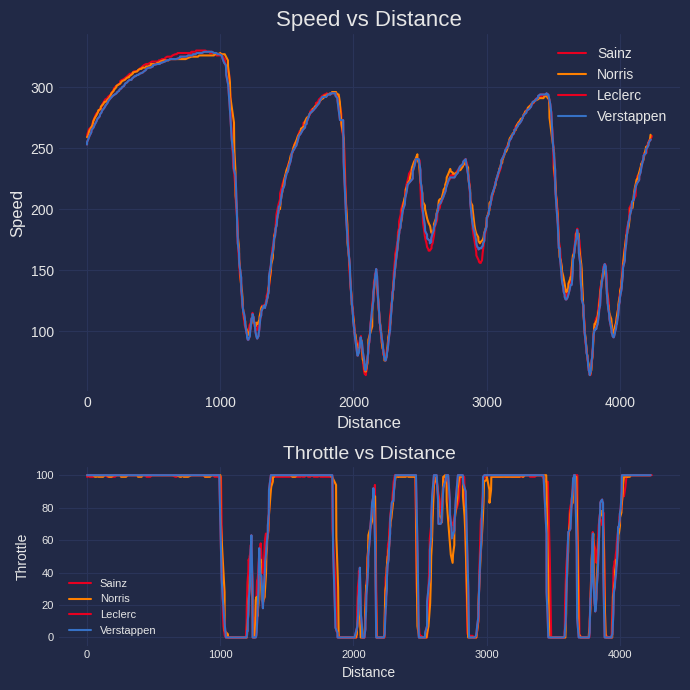

In [54]:
def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_race_sai.Distance,
    tele_race_sai.Speed,
    label="Sainz",
    color=get_driver_color("SAI"),
)
ax[0].plot(
    tele_race_nor.Distance,
    tele_race_nor.Speed,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[0].plot(
    tele_race_ver.Distance,
    tele_race_ver.Speed,
    label="Leclerc",
    color=get_driver_color("LEC"),
)
ax[0].plot(
    tele_race_ver.Distance,
    tele_race_ver.Speed,
    label="Verstappen",
    color=get_driver_color("VER"),
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_race_sai.Distance,
    tele_race_sai.Throttle,
    label="Sainz",
    color=get_driver_color("SAI"),
)
ax[1].plot(
    tele_race_nor.Distance,
    tele_race_nor.Throttle,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[1].plot(
    tele_race_ver.Distance,
    tele_race_ver.Throttle,
    label="Leclerc",
    color=get_driver_color("LEC"),
)
ax[1].plot(
    tele_race_ver.Distance,
    tele_race_ver.Throttle,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [56]:
driver1_sectors = pd.DataFrame({
    'Driver': ['Sainz'] * len(sai_race_sec1),
    'Sector1Time': sai_race_sec1,
    'Sector2Time': sai_race_sec2,
    'Sector3Time': sai_race_sec3,
    'Lap Time' : sai_race_lap_time
})

driver2_sectors = pd.DataFrame({
    'Driver': ['Norris'] * len(nor_race_sec1),
    'Sector1Time': nor_race_sec1,
    'Sector2Time': nor_race_sec2,
    'Sector3Time': nor_race_sec3,
    'Lap Time' : nor_race_lap_time
})

driver3_sectors = pd.DataFrame({
    'Driver': ['Leclerc'] * len(lec_race_sec1),
    'Sector1Time': lec_race_sec1,
    'Sector2Time': lec_race_sec2,
    'Sector3Time': lec_race_sec3,
    'Lap Time' : lec_race_lap_time
})

driver4_sectors = pd.DataFrame({
    'Driver': ['Verstappen'] * len(ver_race_sec1),
    'Sector1Time': ver_race_sec1,
    'Sector2Time': ver_race_sec2,
    'Sector3Time': ver_race_sec3,
    'Lap Time' : ver_race_lap_time
})




all_drivers_sectors = pd.concat([driver1_sectors, driver2_sectors, driver3_sectors,driver4_sectors], ignore_index=True)
all_drivers_sectors['Sector1Time'] = all_drivers_sectors['Sector1Time'].apply(convert_to_normal)
# all_drivers_sectors['Sector2Time'] = all_drivers_sectors['Sector2Time'].apply(convert_to_normal)
all_drivers_sectors['Sector3Time'] = all_drivers_sectors['Sector3Time'].apply(convert_to_normal)
all_drivers_sectors['Lap Time'] = all_drivers_sectors['Lap Time'].apply(convert_to_normal)
all_drivers_sectors.sort_values(by=["Sector1Time","Sector2Time","Sector3Time"],ascending=True).dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
212,Leclerc,00:27.884000,0 days 00:00:30.313000,00:20.139000,01:18.336000
132,Norris,00:27.963000,0 days 00:00:31.312000,00:20.866000,01:20.141000
133,Norris,00:28.001000,0 days 00:00:31.117000,00:20.740000,01:19.858000
129,Norris,00:28.017000,0 days 00:00:31.301000,00:20.845000,01:20.163000
127,Norris,00:28.028000,0 days 00:00:31.418000,00:20.825000,01:20.271000
...,...,...,...,...,...
72,Norris,01:01.310000,0 days 00:00:45.418000,00:31.990000,02:18.718000
143,Leclerc,01:01.380000,0 days 00:00:46.583000,00:30.289000,02:18.252000
1,Sainz,01:01.514000,0 days 00:00:46.266000,00:30.157000,02:17.937000
214,Verstappen,01:01.769000,0 days 00:00:47.111000,00:29.379000,02:18.259000


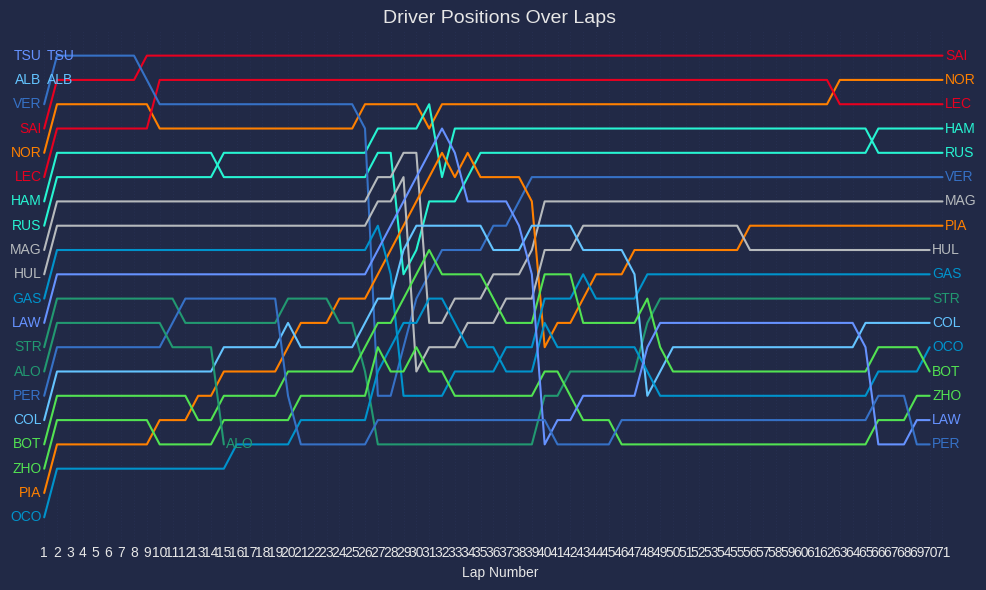

In [57]:
# Get unique drivers and total number of laps
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

# Initialize an empty dictionary to store team colors
team_colors = {}

# Fetch the team color for each driver dynamically and convert to RGB
for driver in drivers_ab:
    driver_object = quali.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

# Plot each driver's positions with their team color
plt.figure(figsize=(10, 6))  # Adjust figure size
for driver in drivers_ab:
    positions = laps[laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))  # Default to gray if no color is specified
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    # Annotate driver name at the start of the line
    plt.text(
        1 - 0.2,  # Slightly to the left of the first lap
        positions[0],  # Y-coordinate of the first position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='right'  # Align text to the right of the point
    )
    
    # Annotate driver name at the end of the line
    plt.text(
        len(positions) + 0.2,  # Slightly to the right of the last lap
        positions[-1],  # Y-coordinate of the last position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='left'  # Align text to the left of the point
    )

# Add plot title and labels
plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)  # Extend x-axis to leave space for annotations
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()  # Invert y-axis so positions are ranked correctly
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

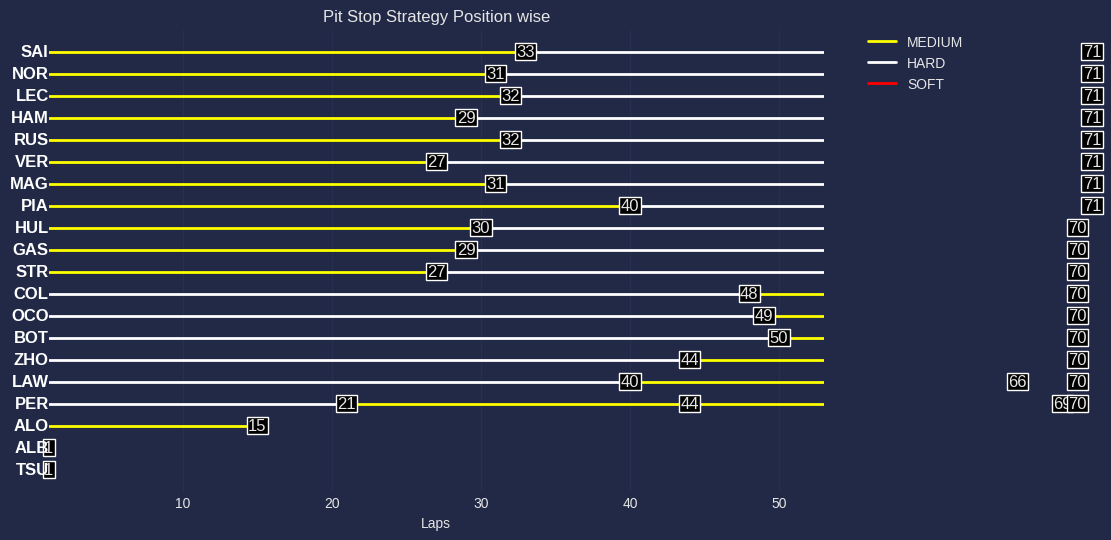

In [58]:
def getDriverPosition(abbreviation: str):
    res = race.results
    c = res["Abbreviation"] == abbreviation
    pos = res.loc[c, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "unknown")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()


In [59]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)
    

/tmp/ipykernel_68408/2770152713.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
17,ALO,341.0
0,SAI,349.0
2,LEC,352.0
9,GAS,352.0
11,COL,353.0
3,HAM,354.0
16,PER,354.0
10,STR,354.0
12,OCO,354.0
13,BOT,354.0


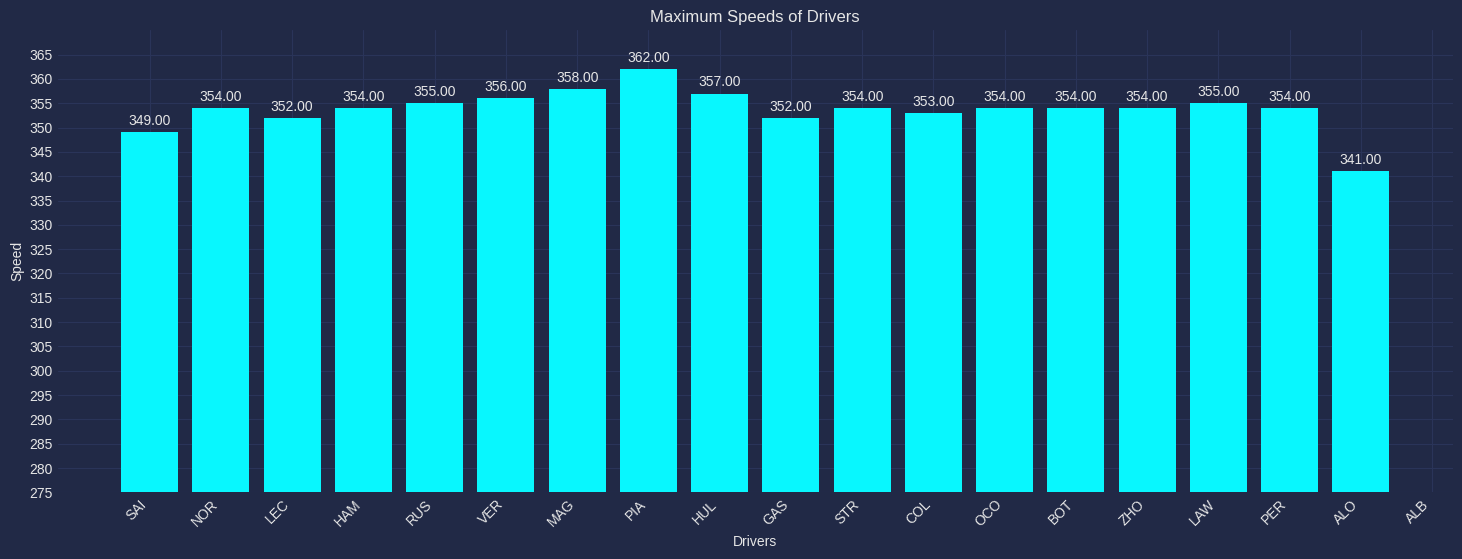

In [60]:
fig,ax = plt.subplots(figsize=(18, 6))


bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])

ax.set_xlabel('Drivers')

ax.set_ylabel('Speed')

ax.set_title('Maximum Speeds of Drivers')

plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.show()

In [61]:
plotting.setup_mpl()

In [62]:
laps_nor = laps.pick_driver("NOR")
laps_ver = laps.pick_driver("VER")

fastest_nor = laps_nor.pick_fastest().get_telemetry().add_distance()
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()

fastest_nor["Driver"] = "NOR"
fastest_ver["Driver"] = "VER"
telemetry = pd.concat([fastest_nor,fastest_ver])

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [63]:
num_minisectors = 25

total_distance = total_distance = max(telemetry['Distance'])

minisector_length = total_distance / num_minisectors

In [64]:
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [65]:

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [66]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,NOR,276.277778
1,1,VER,271.789474
2,2,NOR,302.428571
3,2,VER,299.687500
4,3,NOR,315.800000
5,3,VER,312.928571
6,4,NOR,321.866667
7,4,VER,321.400000
8,5,NOR,324.076923
9,5,VER,326.071429


In [67]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [68]:

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'NOR', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 2

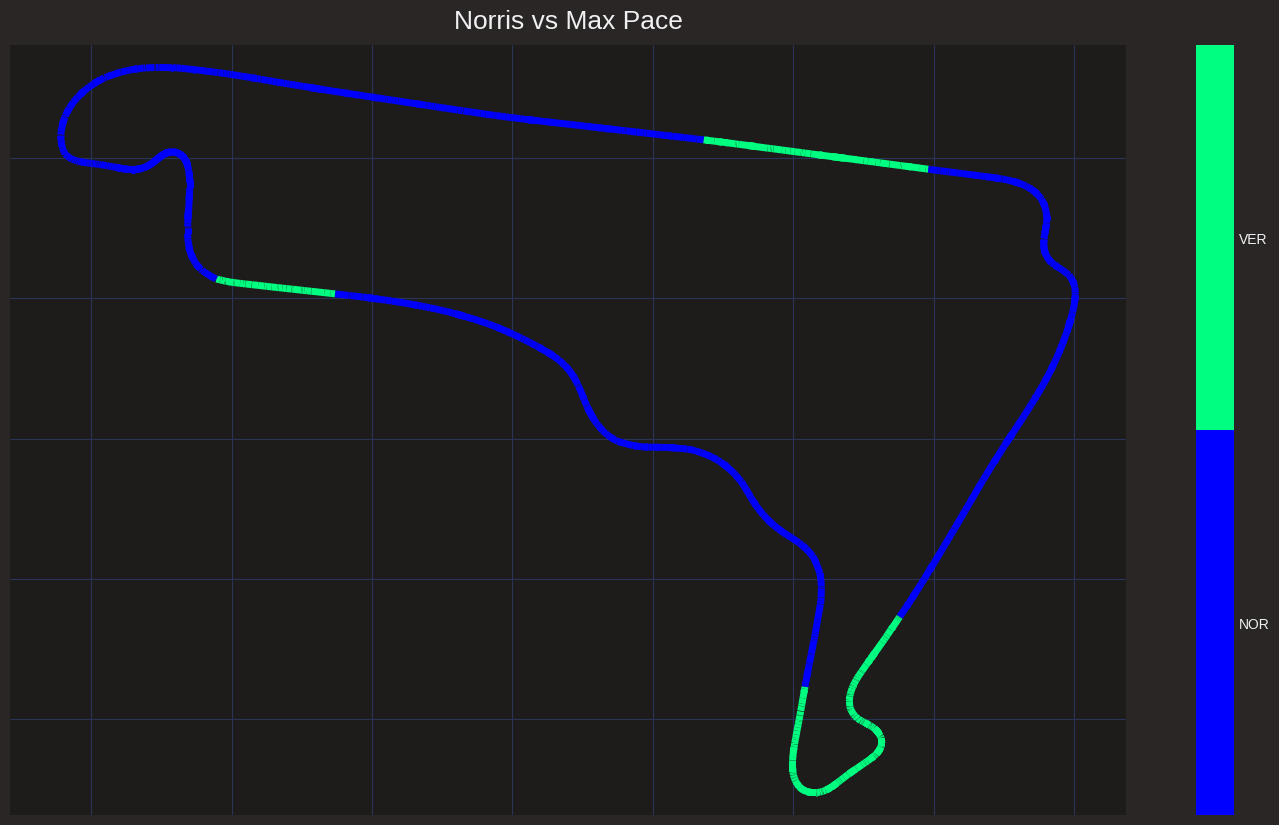

In [69]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Adjust the colorbar settings
cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['NOR', 'VER'])
plt.title("Norris vs Max Pace")
plt.show()
